In [1]:
import numpy as np # for mathematical operations
import pandas as pd # for data manipulation and analysis
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data
dt=pd.read_csv('Iris.csv')

In [3]:
dt.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#checking the shape of the dataset
dt.shape

(150, 6)

In [5]:
# checking the datatypes
dt.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
# Statstical Analysis
dt.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#checking the null values.
dt.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# corealtion of the dataset
dt.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


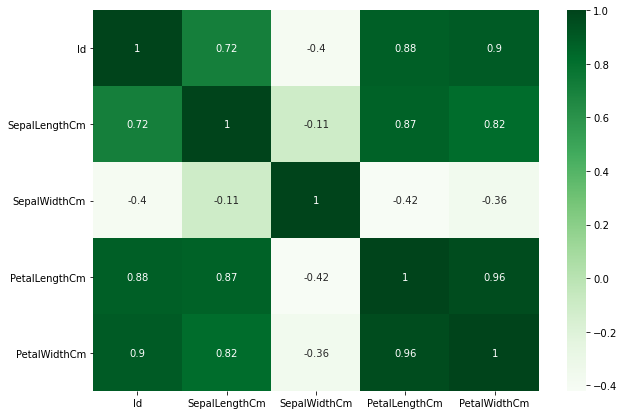

In [9]:
# ploting the heatmap on corelation 
plt.figure(figsize=(10,7))
sns.heatmap(dt.corr(),cmap='Greens',annot=True)

In [10]:
# Seprating the datset with independent and dependent variables and assinging to the x and y variables
x=dt.iloc[:,1:5]
y=dt['Species']

In [11]:
# Spliting the dataset in the form train and test, for the purpose of training and testing of the model
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [12]:
# finding the shape of the xtrain to find the k value
xtrain.shape

(105, 4)

In [13]:
# Fitting the KNN model and finding the optimized k value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for i in range(1,105,2):
    regressor=KNeighborsClassifier(n_neighbors=i)
    regressor.fit(xtrain,ytrain)
    y_pred = regressor.predict(xtest)
    print("Accuracy:",accuracy_score(ytest, y_pred), "for ",i)

Accuracy: 0.9555555555555556 for  1
Accuracy: 0.9555555555555556 for  3
Accuracy: 0.9333333333333333 for  5
Accuracy: 0.9333333333333333 for  7
Accuracy: 0.9555555555555556 for  9
Accuracy: 0.9555555555555556 for  11
Accuracy: 0.9555555555555556 for  13
Accuracy: 0.9555555555555556 for  15
Accuracy: 0.9555555555555556 for  17
Accuracy: 0.9555555555555556 for  19
Accuracy: 0.9777777777777777 for  21
Accuracy: 0.9777777777777777 for  23
Accuracy: 0.9555555555555556 for  25
Accuracy: 0.9555555555555556 for  27
Accuracy: 0.9555555555555556 for  29
Accuracy: 0.9555555555555556 for  31
Accuracy: 0.9555555555555556 for  33
Accuracy: 0.9555555555555556 for  35
Accuracy: 0.9555555555555556 for  37
Accuracy: 0.9555555555555556 for  39
Accuracy: 0.9555555555555556 for  41
Accuracy: 0.9777777777777777 for  43
Accuracy: 0.9555555555555556 for  45
Accuracy: 0.9555555555555556 for  47
Accuracy: 0.9555555555555556 for  49
Accuracy: 0.9555555555555556 for  51
Accuracy: 0.9555555555555556 for  53
Accura

In [14]:
# Fitting the KNN model on  optimized k value.
from sklearn.neighbors import KNeighborsClassifier
regressor=KNeighborsClassifier(n_neighbors=39)
regressor.fit(xtrain,ytrain)
y_pred = regressor.predict(xtest)

In [15]:
# accuracy of the model
print("Accuracy:",accuracy_score(ytest, y_pred))

Accuracy: 0.9555555555555556


In [16]:
# confusion matrix  classification report
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[18  0  0]
 [ 0 13  2]
 [ 0  0 12]]


In [17]:
# classification report
from sklearn.metrics import classification_report 
print(classification_report(ytest, y_pred) )

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.86      1.00      0.92        12

       accuracy                           0.96        45
      macro avg       0.95      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45

